Daniel Hutyra

Projekt zaliczeniowy 

Temat 1: Klasyfikacja

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow
import seaborn as sns

Using TensorFlow backend.


In [2]:
df = pd.read_csv("./creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Z poniższego zapytania widać, że w naszym zbiorze nie ma wartości brakujących. Wszystkie zmienne objaśniające są typu float64, zaś zmienna objaśniana przyjmuje wartości 1 dla fraud oraz 0 dla nie-fraud.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Patrząc na powyższe zmienne można odrazu wykluczyć ze zmiennych objaśniających zmienną "Time", która nie będzie w tym wypadku odpowiednia. Zmienna "Class" jest naszą zmienną objaśnianą.

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

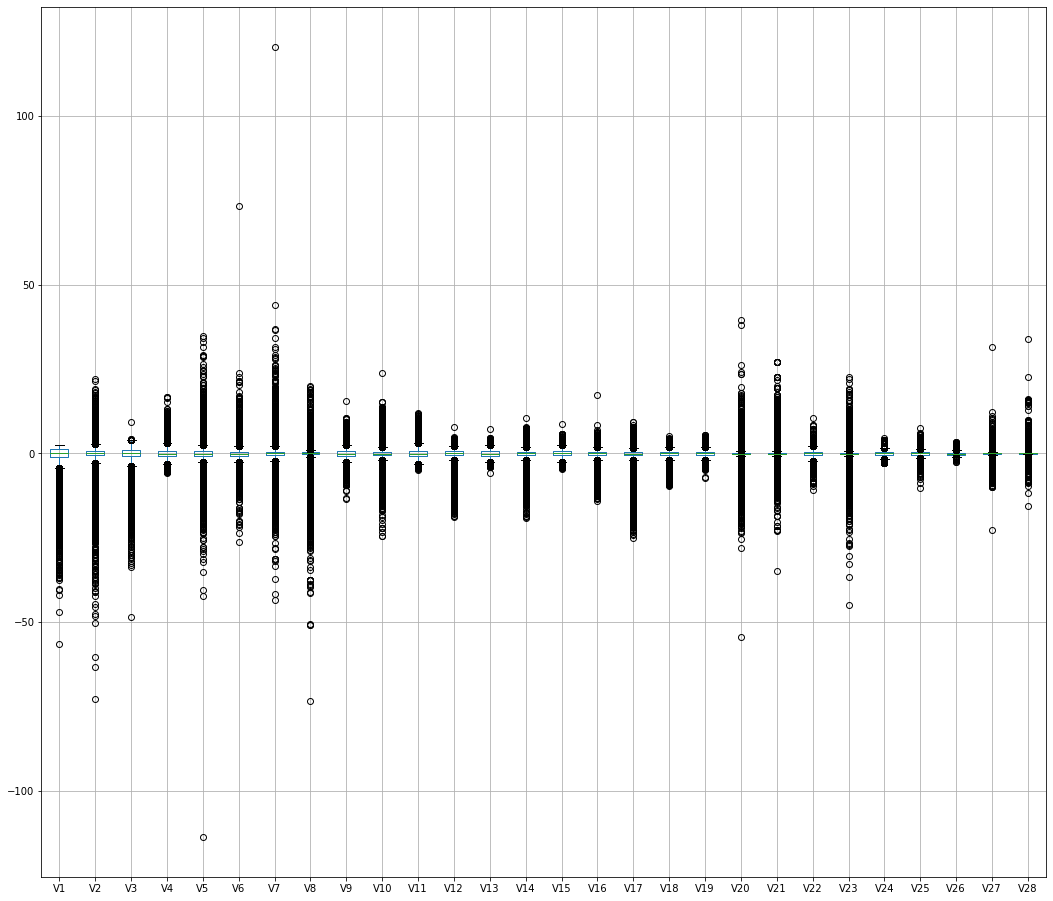

In [8]:
plt.figure(figsize=(18, 16))
df.boxplot(column = list(df.columns[1:29]))

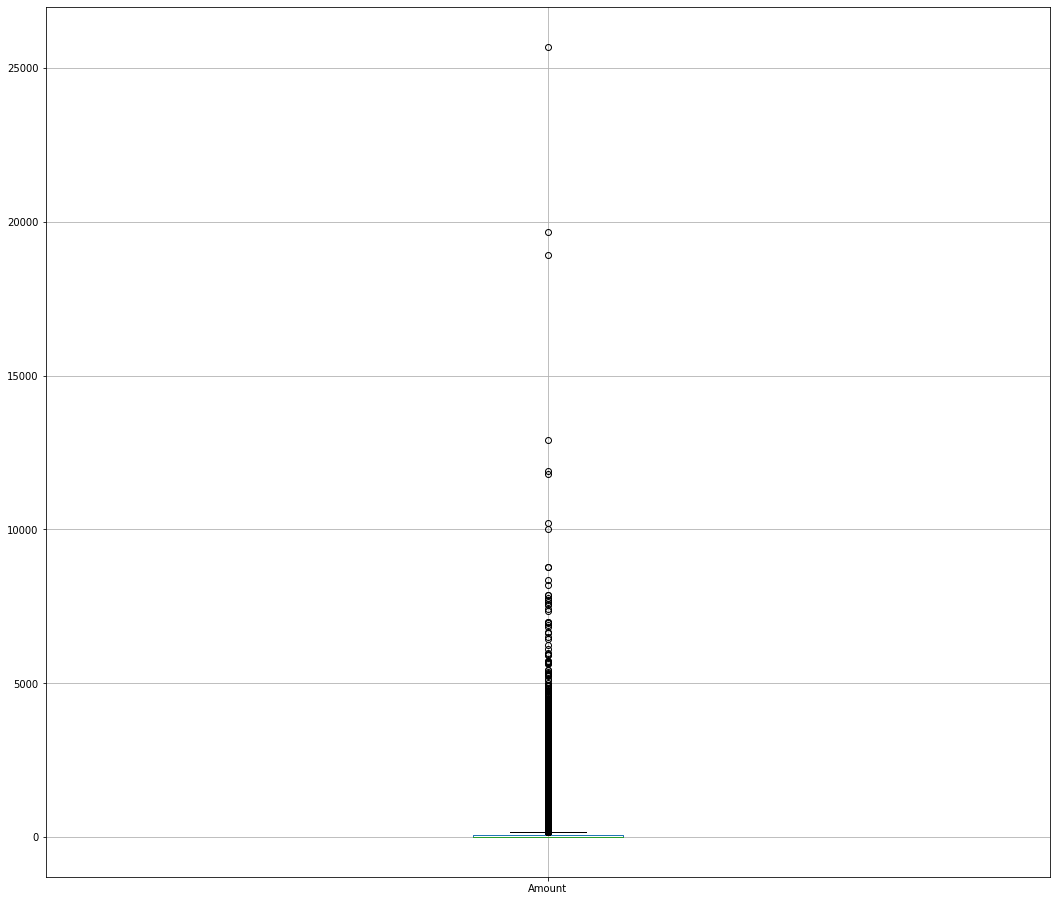

In [9]:
plt.figure(figsize=(18, 16))
df.boxplot(column = list(df.columns[29:30]))

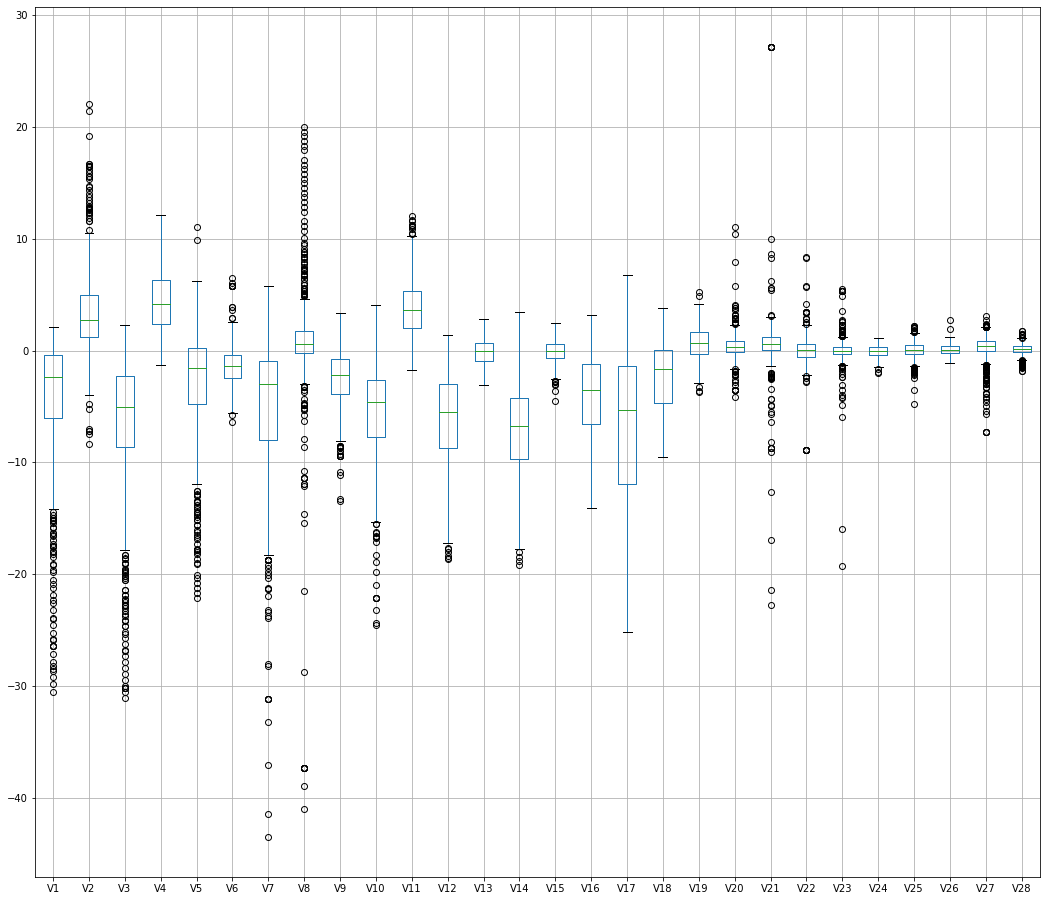

In [10]:
plt.figure(figsize=(18, 16))
df[df.Class == 1].boxplot(column = list(df.columns[1:29]))

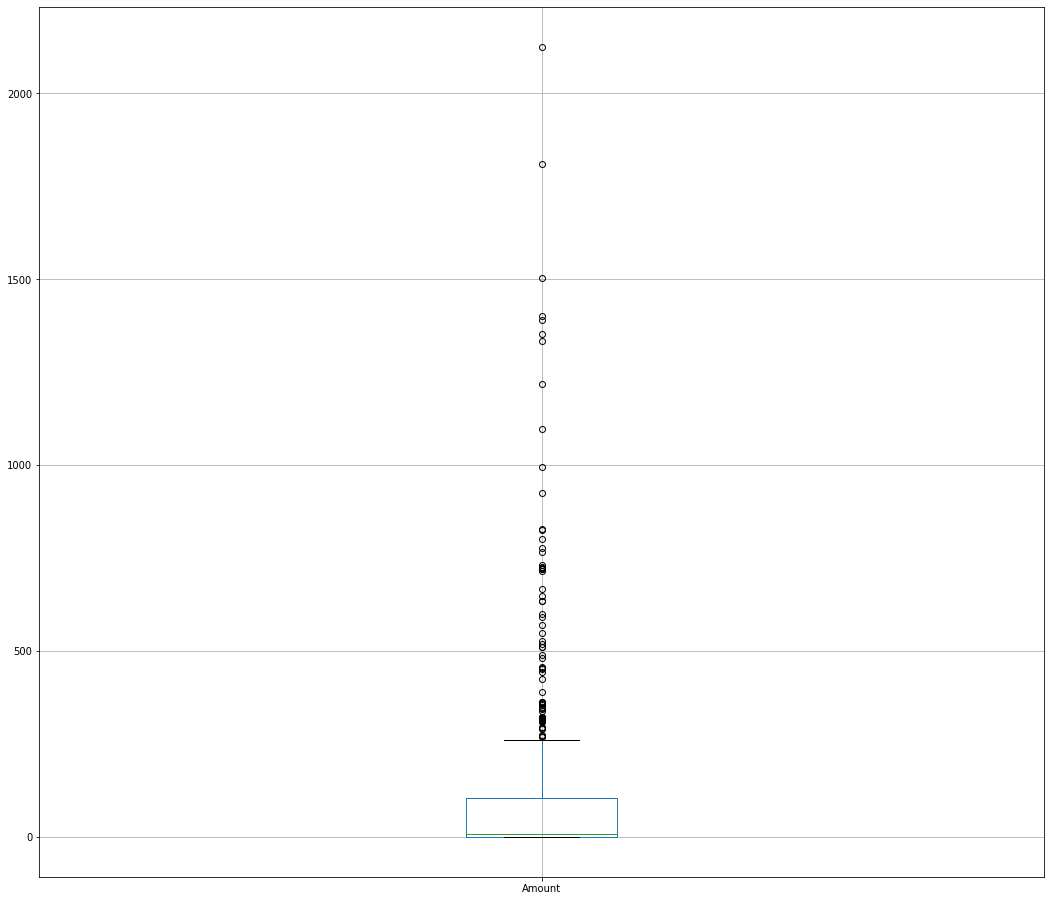

In [11]:
plt.figure(figsize=(18, 16))
df[df.Class == 1].boxplot(column = list(df.columns[29:30]))

Jakoże w naszym zbiorze mamy dużą nadreprezentację transakcji nie-fraudowych, to rozsądnym będzie nie usuwanie outlierów, które mogą wskazywać nam fraud.

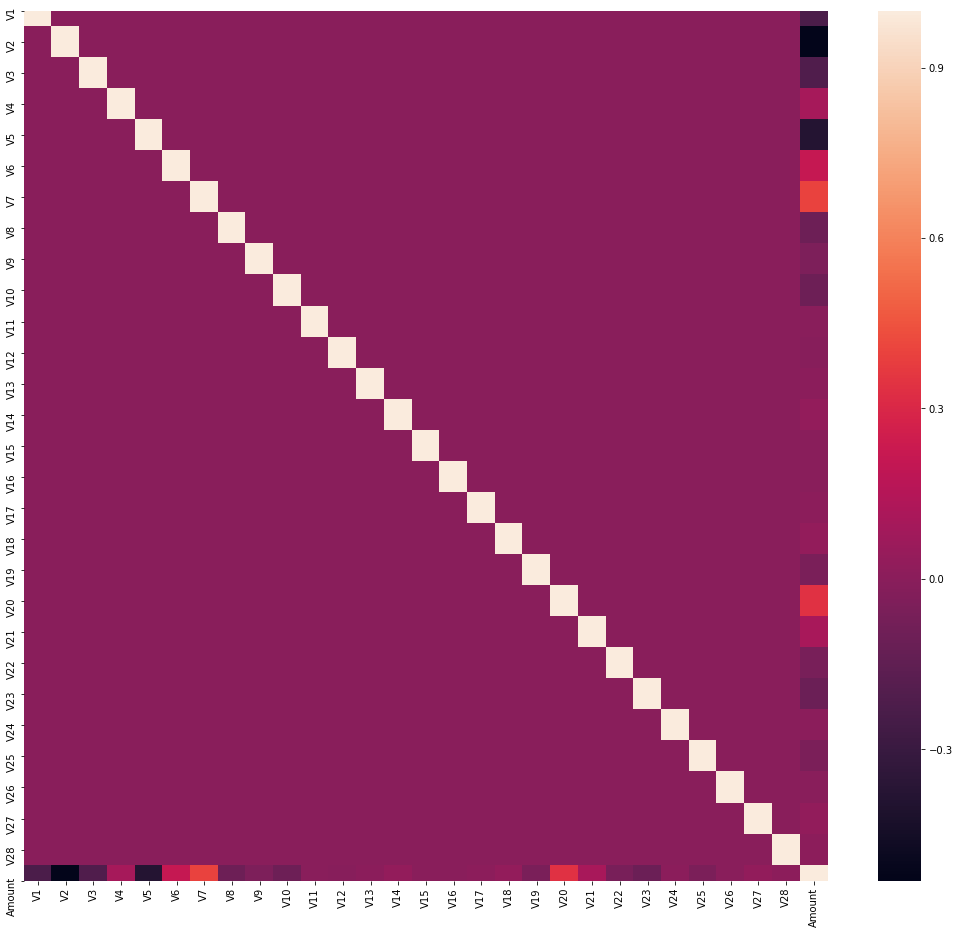

In [12]:
plt.figure(figsize=(18, 16))
sns.heatmap(data= df.iloc[:, 1:30].corr())

Na powyższej heatmapie widzimy brak korelacji pośród zmiennych V#. Jedyna zaobserwowana korelacja jest między niektórymi zmiennymi V# oraz zmienną Amount.

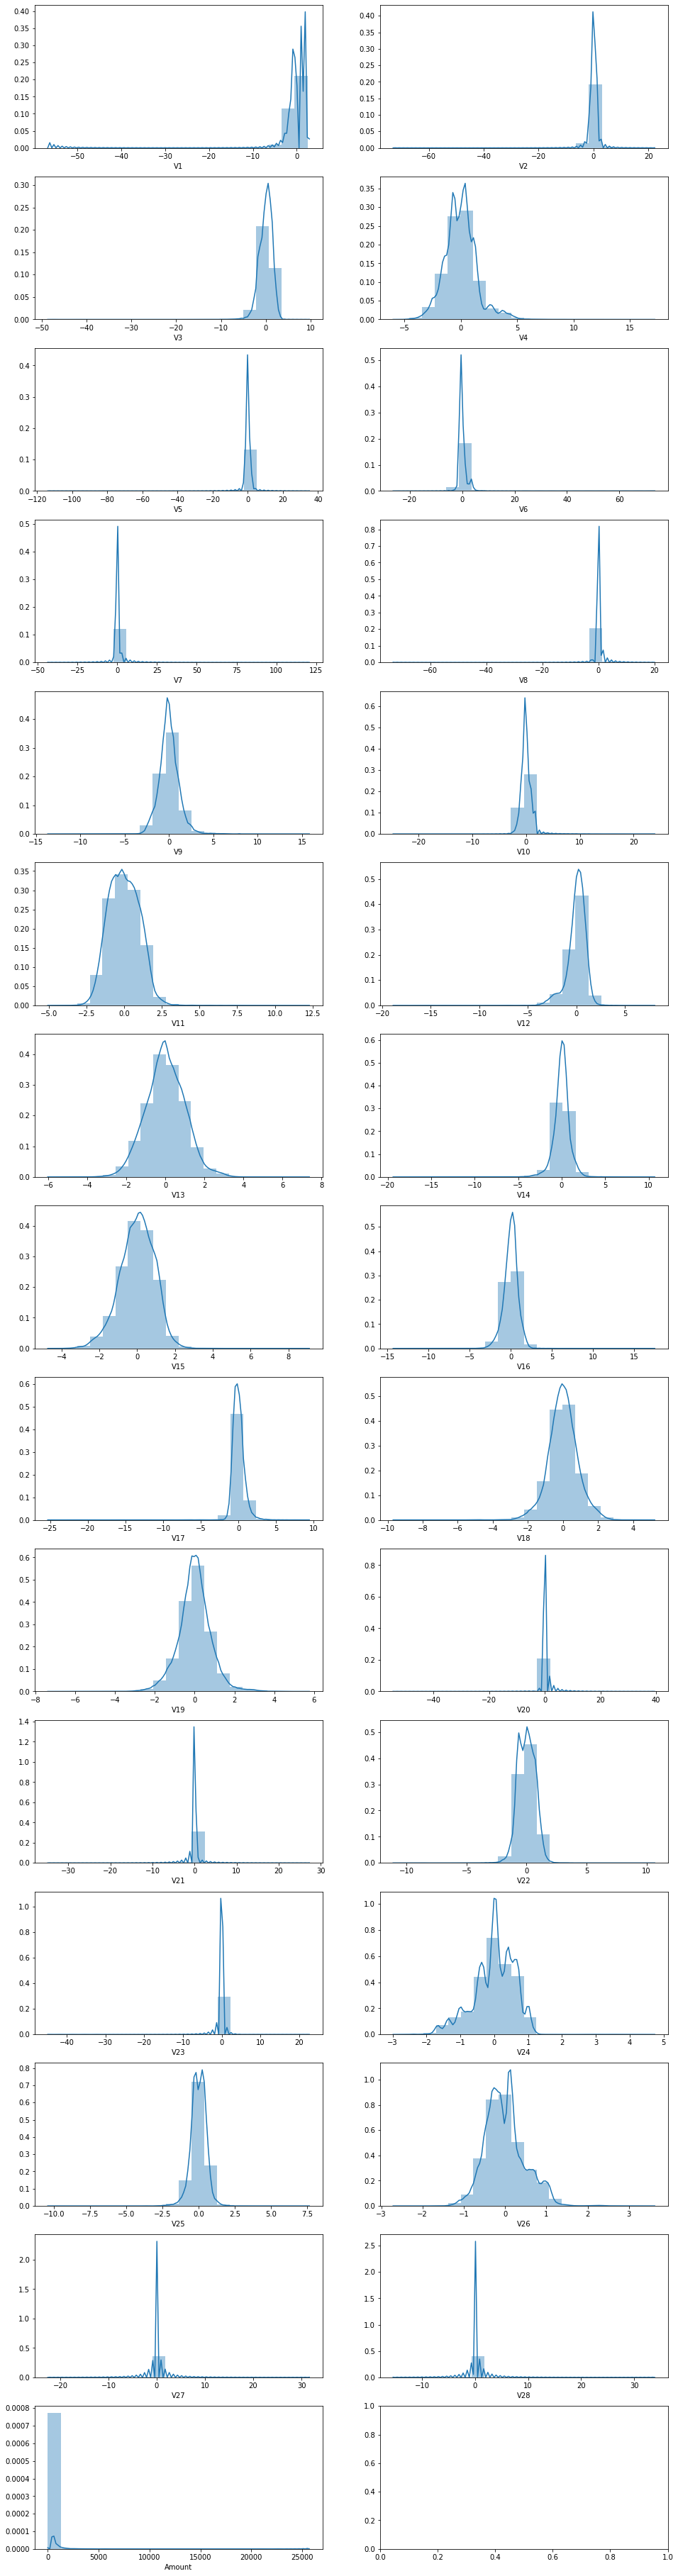

In [13]:
fig, ax = plt.subplots(15,2, figsize=(16,66))
sns.distplot(df.V1, bins = 20, ax=ax[0,0], hist = True) 
sns.distplot(df.V2, bins = 20, ax=ax[0,1]) 
sns.distplot(df.V3, bins = 20, ax=ax[1,0]) 
sns.distplot(df.V4, bins = 20, ax=ax[1,1]) 
sns.distplot(df.V5, bins = 20, ax=ax[2,0])
sns.distplot(df.V6, bins = 20, ax=ax[2,1])
sns.distplot(df.V7, bins = 20, ax=ax[3,0]) 
sns.distplot(df.V8, bins = 20, ax=ax[3,1]) 
sns.distplot(df.V9, bins = 20, ax=ax[4,0]) 
sns.distplot(df.V10, bins = 20, ax=ax[4,1]) 
sns.distplot(df.V11, bins = 20, ax=ax[5,0]) 
sns.distplot(df.V12, bins = 20, ax=ax[5,1]) 
sns.distplot(df.V13, bins = 20, ax=ax[6,0])
sns.distplot(df.V14, bins = 20, ax=ax[6,1])
sns.distplot(df.V15, bins = 20, ax=ax[7,0]) 
sns.distplot(df.V16, bins = 20, ax=ax[7,1]) 
sns.distplot(df.V17, bins = 20, ax=ax[8,0]) 
sns.distplot(df.V18, bins = 20, ax=ax[8,1]) 
sns.distplot(df.V19, bins = 20, ax=ax[9,0]) 
sns.distplot(df.V20, bins = 20, ax=ax[9,1]) 
sns.distplot(df.V21, bins = 20, ax=ax[10,0])
sns.distplot(df.V22, bins = 20, ax=ax[10,1])
sns.distplot(df.V23, bins = 20, ax=ax[11,0]) 
sns.distplot(df.V24, bins = 20, ax=ax[11,1]) 
sns.distplot(df.V25, bins = 20, ax=ax[12,0]) 
sns.distplot(df.V26, bins = 20, ax=ax[12,1]) 
sns.distplot(df.V27, bins = 20, ax=ax[13,0]) 
sns.distplot(df.V28, bins = 20, ax=ax[13,1]) 
sns.distplot(df.Amount, bins = 20, ax=ax[14,0]) 

Tutaj pokazuję rozkłady wszystkich zmiennych objaśnianych przy użyciu distribution plot.

Przechodzę do kroku podziału danych na zbiory testowe oraz treningowe.

In [14]:
X = df.iloc[:, 1:30]
Y = df.iloc[:, 30]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print(y_test.value_counts())

0    56846
1      116
Name: Class, dtype: int64


Budowanie modelów:
1. Model regresji logistycznej

In [15]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction)
rec = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

results = pd.DataFrame([['Logistic Regression (Every feature)', acc, prec, rec, f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.8625,0.594828,0.704082


Jakoże budujemy model do wykrywania fraudów, to miara jak accuracy jest dla nas nieodpowiednia. Po pierwsze ze względu na dużą nadreprezentację transakcji nie-fraudowych. Po drugie dużo bardziej pożądana przez nas sytuacja jest taka, w której błędnie uznamy coś za fraud, a nie osiągniemy najlepszą trafność. Dlatego recall, czyli stosunek ilości pozytywnie zaklasyfikowanych fraudów do ilości wszystkich faktycznych fraudów będzie naszym parametrem oceniającym jakość modelu. 

In [16]:
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

prediction = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction)
rec = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

model_results = pd.DataFrame([['Logistic Regression with RFE (default no of features)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(X_train[X_train.columns[rfe.support_]].shape)

results

C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

(227845, 14)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340


Wyżej użyta je metoda pochodzi z rodziny wrapper methods do feature selectingu - RFE. Jest to metoda regresyjna, bazująca na wydajności modelu przy zmianie liczby zmiennych objaśniających.

In [17]:
for i in range(10, 25, 3):
    rfe = RFE(classifier, n_features_to_select = i)
    rfe = rfe.fit(X_train, y_train)

    classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

    prediction = classifier.predict(X_test[X_train.columns[rfe.support_]])
    acc = accuracy_score(y_test, prediction)
    prec = precision_score(y_test, prediction)
    rec = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)

    model_results = pd.DataFrame([['Logistic Regression with RFE (' + str(i) + ' features)', acc, prec, rec, f1]],
                                 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

    results = results.append(model_results, ignore_index = True)
results

C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660


2. Naiwny model Bayes'owski

In [18]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction)
rec = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

model_results = pd.DataFrame([['Naive Bayes (Every feature)', acc, prec, rec, f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153


Jakoże wcześniej użyta metoda była odpowiednia dla regresji logistycznej, tak teraz przy algorytmie Bayesowskim jesteśmy zmuszeni skorzystać z innego sposobu doboru feature'sów. Skorzystamy teraz z jednej z filter methodes w wybieraniu atrybutów. Tym razem wykorzystywana przez nas metoda nie bierze pod uwagę wyników modelu, lecz dzieli zbiór przed modelowaniem. 

In [19]:
for i in range(7, 25, 3):
    top_k_vars = SelectKBest(score_func=f_classif, k=i)
    X_train_new = top_k_vars.fit_transform(X_train, y_train)
    columns_new = [X_train.columns[i] for i in top_k_vars.get_support(indices=True)]
    X_test_new = X_test[columns_new]
    classifier = GaussianNB()
    classifier.fit(X_train_new, y_train)
    
    prediction = classifier.predict(X_test_new)
    acc = accuracy_score(y_test, prediction)
    prec = precision_score(y_test, prediction)
    rec = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)

    model_results = pd.DataFrame([['Naive Bayes (' + str(i) + ' features)', acc, prec, rec, f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
    results = results.append(model_results, ignore_index = True)
    
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153
8,Naive Bayes (7 features),0.989256,0.139535,0.827586,0.238806
9,Naive Bayes (10 features),0.990309,0.152866,0.827586,0.258065


3a. K-najbliższych sąsiadów dla k = 3

In [20]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction)
rec = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

model_results = pd.DataFrame([['K-nearest neighbors for k=3 (Every feature)', acc, prec, rec, f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153
8,Naive Bayes (7 features),0.989256,0.139535,0.827586,0.238806
9,Naive Bayes (10 features),0.990309,0.152866,0.827586,0.258065


Ponownie z tych samych powodów korzystamy z feature selection użytego w algorytmie Naiwnym Bayesowskim

In [21]:
for i in range(7, 22, 3):
    top_k_vars = SelectKBest(score_func=f_classif, k=i)
    X_train_new = top_k_vars.fit_transform(X_train, y_train)
    columns_new = [X_train.columns[i] for i in top_k_vars.get_support(indices=True)]
    X_test_new = X_test[columns_new]
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train_new, y_train)
    
    prediction = classifier.predict(X_test_new)
    acc = accuracy_score(y_test, prediction)
    prec = precision_score(y_test, prediction)
    rec = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)

    model_results = pd.DataFrame([['K-nearest neighbors for k=3 (' + str(i) + ' features)', acc, prec, rec, f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
    results = results.append(model_results, ignore_index = True)
    
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153
8,Naive Bayes (7 features),0.989256,0.139535,0.827586,0.238806
9,Naive Bayes (10 features),0.990309,0.152866,0.827586,0.258065


3b. K-najbliższych sąsiadów dla k = 6

In [22]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction)
rec = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

model_results = pd.DataFrame([['K-nearest neighbors for k=6 (Every feature)', acc, prec, rec, f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153
8,Naive Bayes (7 features),0.989256,0.139535,0.827586,0.238806
9,Naive Bayes (10 features),0.990309,0.152866,0.827586,0.258065


In [23]:
for i in range(7, 22, 3):
    top_k_vars = SelectKBest(score_func=f_classif, k=i)
    X_train_new = top_k_vars.fit_transform(X_train, y_train)
    columns_new = [X_train.columns[i] for i in top_k_vars.get_support(indices=True)]
    X_test_new = X_test[columns_new]
    classifier = KNeighborsClassifier(n_neighbors=6)
    classifier.fit(X_train_new, y_train)
    
    prediction = classifier.predict(X_test_new)
    acc = accuracy_score(y_test, prediction)
    prec = precision_score(y_test, prediction)
    rec = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)

    model_results = pd.DataFrame([['K-nearest neighbors for k=6 (' + str(i) + ' features)', acc, prec, rec, f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
    results = results.append(model_results, ignore_index = True)
    
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153
8,Naive Bayes (7 features),0.989256,0.139535,0.827586,0.238806
9,Naive Bayes (10 features),0.990309,0.152866,0.827586,0.258065


4. Las losowy

In [24]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction)
rec = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

model_results = pd.DataFrame([['Random forest (Every feature)', acc, prec, rec, f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results = results.append(model_results, ignore_index = True)
results

C:\Users\Y50\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153
8,Naive Bayes (7 features),0.989256,0.139535,0.827586,0.238806
9,Naive Bayes (10 features),0.990309,0.152866,0.827586,0.258065


W przypadku lasu losowego możemy ponownie wykorzystać metodę RFE do wyboru zmiennych objaśniających.

In [25]:
rfe = RFE(classifier, n_features_to_select = None)
rfe = rfe.fit(X_train, y_train)

classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

prediction = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction)
rec = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

model_results = pd.DataFrame([['Random forest with RFE (default no of features)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(X_train[X_train.columns[rfe.support_]].shape)

results

(227845, 14)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153
8,Naive Bayes (7 features),0.989256,0.139535,0.827586,0.238806
9,Naive Bayes (10 features),0.990309,0.152866,0.827586,0.258065


5. Sieci neuronowe

In [27]:
classifier = Sequential()
classifier.add(Dense(64, activation = 'relu', input_dim = 29))
classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dense(16, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

classifier.compile(optimizer = "adam", loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs = 15, batch_size = 64)

prediction = classifier.predict_classes(X_test)
acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction)
rec = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

model_results = pd.DataFrame([['Deep neural network', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

results

Epoch 1/15
227845/227845 [==============================] - 5s 21us/step - loss: 0.0611 - accuracy: 0.9960
Epoch 2/15
227845/227845 [==============================] - 5s 21us/step - loss: 0.0069 - accuracy: 0.9994
Epoch 3/15
227845/227845 [==============================] - 5s 20us/step - loss: 0.0054 - accuracy: 0.9994
Epoch 4/15
227845/227845 [==============================] - 5s 20us/step - loss: 0.0054 - accuracy: 0.9994
Epoch 5/15
227845/227845 [==============================] - 4s 18us/step - loss: 0.0051 - accuracy: 0.9994
Epoch 6/15
227845/227845 [==============================] - 4s 18us/step - loss: 0.0040 - accuracy: 0.9995
Epoch 7/15
227845/227845 [==============================] - 4s 19us/step - loss: 0.0034 - accuracy: 0.9995
Epoch 8/15
227845/227845 [==============================] - 5s 20us/step - loss: 0.0036 - accuracy: 0.9995
Epoch 9/15
227845/227845 [==============================] - 5s 21us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 10/15
227845/227845 [==========

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Every feature),0.998982,0.862500,0.594828,0.704082
1,Logistic Regression with RFE (default no of fe...,0.999017,0.884615,0.594828,0.711340
2,Logistic Regression with RFE (10 features),0.998982,0.862500,0.594828,0.704082
3,Logistic Regression with RFE (13 features),0.999017,0.884615,0.594828,0.711340
4,Logistic Regression with RFE (16 features),0.998982,0.862500,0.594828,0.704082
5,Logistic Regression with RFE (19 features),0.998982,0.862500,0.594828,0.704082
6,Logistic Regression with RFE (22 features),0.998999,0.864198,0.603448,0.710660
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153
8,Naive Bayes (7 features),0.989256,0.139535,0.827586,0.238806
9,Naive Bayes (10 features),0.990309,0.152866,0.827586,0.258065


In [28]:
results.sort_values('Recall', ascending = False)

,Model,Accuracy,Precision,Recall,F1 Score
10,Naive Bayes (13 features),0.988027,0.126649,0.827586,0.219680
8,Naive Bayes (7 features),0.989256,0.139535,0.827586,0.238806
9,Naive Bayes (10 features),0.990309,0.152866,0.827586,0.258065
11,Naive Bayes (16 features),0.984095,0.097760,0.827586,0.174863
12,Naive Bayes (19 features),0.981391,0.083774,0.818966,0.152000
7,Naive Bayes (Every feature),0.977546,0.069578,0.810345,0.128153
13,Naive Bayes (22 features),0.978881,0.073725,0.810345,0.135155
16,K-nearest neighbors for k=3 (10 features),0.999508,0.948980,0.801724,0.869159
27,Random forest with RFE (default no of features),0.999508,0.958333,0.793103,0.867925
15,K-nearest neighbors for k=3 (7 features),0.999491,0.948454,0.793103,0.863850


Wychodzi na to, że przy modelach jakie przetestowaliśmy, to model Naiwny Bayesowy okazał się najbardziej dopasowanym do naszego problemu, gdyż cechuje się on najwyższym poziomem Recall ponieważ jak już wcześniej wspomniałem - interesuje nas sytuacja w której udaje nam się zaklasyfikować jak największy % fraudów jako fraud. Niestety taki model cechuje się wyjątkowo niskim poziomem Precision, które straciło na wartości kosztem Recall. Również w porównaniu do innych modeli, ma on stosunkowo niski poziom Accuracy, czyli faktycznego % dobrze zakwalifikowanych kategorii, bez względu na to czy była to klasyfikacja fraud czy też nie-fraud. Model ten okazał się równie skuteczny dla 7, 10, 13 oraz 16 zmiennych objaśniających pod względem Recall, lecz model o 10 atrybutach wykazał się spośród nich najwyższym poziomem Accuracy oraz Precision.